# 1. Collecting Reviews

## Setting Up Beautiful Soup and Requests

In [3]:
!pip install requests beautifulsoup4

In [4]:
import requests 
from bs4 import BeautifulSoup
import re

In [5]:
#Make a request to Yelp to get the raw HTML document using requests
r = requests.get('https://www.yelp.com/biz/mcdonalds-los-angeles-106')

In [6]:
#Check the status of that call
r.status_code

200

In [7]:
#View the raw response
r.text

'<!DOCTYPE html><html lang="en-US" prefix="og: http://ogp.me/ns#" style="margin: 0;padding: 0; border: 0; font-size: 100%; font: inherit; vertical-align: baseline;"><head><script>document.documentElement.className=document.documentElement.className.replace(/\x08no-js\x08/,"js");</script><meta http-equiv="Content-Type" content="text/html; charset=UTF-8" /><meta http-equiv="Content-Language" content="en-US" /><meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no"><link rel="mask-icon" sizes="any" href="https://s3-media0.fl.yelpcdn.com/assets/srv0/yelp_large_assets/b2bb2fb0ec9c/assets/img/logos/yelp_burst.svg" content="#FF1A1A"><link rel="shortcut icon" href="https://s3-media0.fl.yelpcdn.com/assets/srv0/yelp_large_assets/dcfe403147fc/assets/img/logos/favicon.ico"><script> window.ga=window.ga||function(){(ga.q=ga.q||[]).push(arguments)};ga.l=+new Date;window.ygaPageStartTime=new Date().getTime();</script><script>\n            window.yelp = window.yelp || {};\

## Convert Text to Soup

In [8]:
# Convert raw HTML to soup
soup = BeautifulSoup(r.text,'html.parser')

In [10]:
# Example of getting all the links in a page
soup.find_all('a')

[<a class="logo-link__09f24__fS20h css-f4x8dl" href="/" role="link">Yelp</a>,
 <a class="header-link__09f24__dlphu" href="/writeareview"><div class="padding-t1__09f24__fS5BJ padding-r1__09f24__ibKww padding-b1__09f24__mrxd5 padding-l1__09f24__bjmD7 border-color--default__09f24__NPAKY"><div class="notification-wrapper__09f24__Synq6 display--inline-block__09f24__fEDiJ border-color--default__09f24__NPAKY"><p class="header-link-text__09f24__LhRgF css-gutk1c" data-font-weight="semibold">Write a Review</p></div></div></a>,
 <a class="login-button__09f24__JVeQy css-11i4m5w" data-activated="false" data-button="true" href="/login?return_url=https%3A%2F%2Fwww.yelp.com%2Fbiz%2Fmcdonalds-los-angeles-106"><span class="css-1enow5j" data-font-weight="semibold">Log In</span></a>,
 <a class="hide-below-b__09f24__vjFMq css-f14jpt" data-activated="false" data-button="true" href="/signup?return_url=https%3A%2F%2Fwww.yelp.com%2Fbiz%2Fmcdonalds-los-angeles-106"><span class="css-1enow5j" data-font-weight="se

In [17]:
# Grab all of the reviews where the tag is span
# where lang = en anc class includes raw__
regex = re.compile('raw__')
results = soup.find_all('span',{'lang':'en'}, class_=regex)

In [20]:
reviews = [review.text for review in results]; reviews 

["Just an average McDonald's Nothing particularly special. Love a late night burger though",
 'Nice floor and sitting area, clean store, food ok. Nice staffs. Much better than many other MDs',
 "Ordered from a fast food burger place that left out my burgers. 'Nuff said. Cheeseburger",
 "Very clean and organized. I like it made me feel comfortable. The staff are very nice and polite do there job very well. The staff are fast and know how to keep the line short. You order in one side and pick up in the other side. They have seating available. In the first floor you can sit or go up the stairs to more seating and the bathrooms. Didn't go in the bathroom's but I know they have bathrooms. This is one of the best McDonald's I ever been into. I will be coming back here.",
 'Lastima que no hay estrella cero , los empleados deberian a estar más entrenados , siempre me toca con la cajera del Drive con mala actitud y falta de respeto a los clientes , piensa que van a pedir las cosas de gratis , y

## Scraping Multiple Pages

In [21]:
[
'https://www.yelp.com/biz/mcdonalds-los-angeles-106',
'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=10'#page 2
'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=60'#page 7
'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=120'#page 13
]

['https://www.yelp.com/biz/mcdonalds-los-angeles-106',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=10https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=60https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=120']

In [26]:
#Dynamic link generation
links = [f'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start={10+x*10}' for x in range(12)]
links.insert(0,'https://www.yelp.com/biz/mcdonalds-los-angeles-106')

In [27]:
links

['https://www.yelp.com/biz/mcdonalds-los-angeles-106',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=10',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=20',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=30',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=40',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=50',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=60',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=70',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=80',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=90',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=100',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=110',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=120']

In [29]:
reviews=[]
for link in links:
    r=requests.get(link)
    soup=BeautifulSoup(r.text,'html.parser')
    results = soup.find_all('span',{'lang':'en'},class_=regex)
    reviews = [*reviews, *[result.text for result in results]]
reviews

["Just an average McDonald's Nothing particularly special. Love a late night burger though",
 'Nice floor and sitting area, clean store, food ok. Nice staffs. Much better than many other MDs',
 "Ordered from a fast food burger place that left out my burgers. 'Nuff said. Cheeseburger",
 "Very clean and organized. I like it made me feel comfortable. The staff are very nice and polite do there job very well. The staff are fast and know how to keep the line short. You order in one side and pick up in the other side. They have seating available. In the first floor you can sit or go up the stairs to more seating and the bathrooms. Didn't go in the bathroom's but I know they have bathrooms. This is one of the best McDonald's I ever been into. I will be coming back here.",
 'Lastima que no hay estrella cero , los empleados deberian a estar más entrenados , siempre me toca con la cajera del Drive con mala actitud y falta de respeto a los clientes , piensa que van a pedir las cosas de gratis , y

In [30]:
len(reviews)

115

# 2. Analysing the Reviews

## Calculating Text Metrics

In [35]:
import pandas as pd
import numpy as np

In [34]:
df = pd.DataFrame(np.array(reviews),columns=['review'])

In [44]:
df['word_count'] = df['review'].apply(lambda x: len(str(x).split(" ")))
df['char_count'] = df['review'].str.len()

In [46]:
df['char_count'].max()

1455

In [45]:
df.head()

,review,word_count,char_count
0,Just an average McDonald's Nothing particularl...,13,88
1,"Nice floor and sitting area, clean store, food...",17,95
2,Ordered from a fast food burger place that lef...,15,88
3,Very clean and organized. I like it made me fe...,97,485
4,"Lastima que no hay estrella cero , los emplead...",84,412


In [40]:
df['word_count'].max()

274

In [43]:
print(df[df['word_count']==274]['review'].values[0])

Our morning started out right: it was bright and early, and I was well-rested and HUNGRY.  Like, I need food NOW.  13 hours of power-walking around Disneyland the day before does this to a person!So we got on the road and found a great restaurant on Yelp. Hundreds of reviews and very high rating. And when we were a block away, my husband turned the car around and decided to go to McDonalds. Really? That's what he wanted on his 30th bday?!!What he really wanted was a fast meal so that we could see the sites we wanted to and then make the drive back up to the Bay Area. So McDonalds it was.  Drive-thru was fast - oddly, a woman stood out front and she took our order. Only strange because the car behind us ordered at the usual screen thing. No matter.  I tried the all egg-white McMuffin (no additional charge for the all-white substitution). This was new to me. Just as good as the McMuffin I've always enjoyed. But healthier, I guess. Not that I'm dining at McD's because I'm all that health 

## Counting Stopwords

In [47]:
!pip install nltk

In [48]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anapedra/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [53]:
stop_words = stopwords.words('english')

In [54]:
df['stopword_count'] = df['review'].apply(lambda x: len([x for x in x.split() if x in stop_words]))

In [56]:
df['stopword_count'].max()

115

In [58]:
df[df['stopword_count']==115]

,review,word_count,char_count,stopword_count
52,Our morning started out right: it was bright a...,274,1455,115


In [ ]:
df.head()

# 3. Cleaning the Dataset

## Lowercasing all Words

In [61]:
df['review_lower'] = df['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [62]:
" ".join([x.lower() for x in df['review'].iloc[0].split()])

"just an average mcdonald's nothing particularly special. love a late night burger though"

In [63]:
df.head()

,review,word_count,char_count,stopword_count,review_lower
0,Just an average McDonald's Nothing particularl...,13,88,2,just an average mcdonald's nothing particularl...
1,"Nice floor and sitting area, clean store, food...",17,95,3,"nice floor and sitting area, clean store, food..."
2,Ordered from a fast food burger place that lef...,15,88,5,ordered from a fast food burger place that lef...
3,Very clean and organized. I like it made me fe...,97,485,42,very clean and organized. i like it made me fe...
4,"Lastima que no hay estrella cero , los emplead...",84,412,11,"lastima que no hay estrella cero , los emplead..."


## Stripping Punctuation

In [64]:
df['review_nopunc'] = df['review_lower'].str.replace('[^\w\s]','')

/var/folders/28/zv1y66mj7x79z14763lmcy080000gn/T/ipykernel_43302/760639540.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review_nopunc'] = df['review_lower'].str.replace('[^\w\s]','')


In [65]:
df.head()

,review,word_count,char_count,stopword_count,review_lower,review_nopunc
0,Just an average McDonald's Nothing particularl...,13,88,2,just an average mcdonald's nothing particularl...,just an average mcdonalds nothing particularly...
1,"Nice floor and sitting area, clean store, food...",17,95,3,"nice floor and sitting area, clean store, food...",nice floor and sitting area clean store food o...
2,Ordered from a fast food burger place that lef...,15,88,5,ordered from a fast food burger place that lef...,ordered from a fast food burger place that lef...
3,Very clean and organized. I like it made me fe...,97,485,42,very clean and organized. i like it made me fe...,very clean and organized i like it made me fee...
4,"Lastima que no hay estrella cero , los emplead...",84,412,11,"lastima que no hay estrella cero , los emplead...",lastima que no hay estrella cero los empleado...


In [66]:
df['review_lower'].iloc[0]

"just an average mcdonald's nothing particularly special. love a late night burger though"

In [67]:
df['review_nopunc'].iloc[0]

'just an average mcdonalds nothing particularly special love a late night burger though'

## Removing Stopwords

In [83]:
df['review_nostop'] = df['review_nopunc'].apply(lambda x:" ".join(x for x in x.split() if x not in stop_words))

In [84]:
df['review_nopunc'].iloc[0]

'just an average mcdonalds nothing particularly special love a late night burger though'

In [85]:
" ".join([x for x in df['review_nopunc'].iloc[0].split() if x not in stop_words])

'average mcdonalds nothing particularly special love late night burger though'

In [86]:
df.head()

,review,word_count,char_count,stopword_count,review_lower,review_nopunc,review_nostop
0,Just an average McDonald's Nothing particularl...,13,88,2,just an average mcdonald's nothing particularl...,just an average mcdonalds nothing particularly...,average mcdonalds nothing particularly special...
1,"Nice floor and sitting area, clean store, food...",17,95,3,"nice floor and sitting area, clean store, food...",nice floor and sitting area clean store food o...,nice floor sitting area clean store food ok ni...
2,Ordered from a fast food burger place that lef...,15,88,5,ordered from a fast food burger place that lef...,ordered from a fast food burger place that lef...,ordered fast food burger place left burgers nu...
3,Very clean and organized. I like it made me fe...,97,485,42,very clean and organized. i like it made me fe...,very clean and organized i like it made me fee...,clean organized like made feel comfortable sta...
4,"Lastima que no hay estrella cero , los emplead...",84,412,11,"lastima que no hay estrella cero , los emplead...",lastima que no hay estrella cero los empleado...,lastima que hay estrella cero los empleados de...


## Visualising Common Words

In [109]:
import seaborn as sns
from matplotlib import pyplot as plt

In [110]:
pd.Series(" ".join(df['review_nostop']).split()).value_counts().reset_index()

,index,0
0,mcdonalds,70
1,order,55
2,food,43
3,drive,36
4,service,34
...,...,...
1537,quickly,1
1538,complaints,1
1539,failure,1
1540,szechuan,1


In [115]:
freq = pd.Series(" ".join(df['review_nostop']).split()).value_counts()[:80].reset_index()

In [116]:
freq.columns = ['words','frequencies']

In [117]:
freq

,words,frequencies
0,mcdonalds,70
1,order,55
2,food,43
3,drive,36
4,service,34
...,...,...
75,said,8
76,car,8
77,every,8
78,still,8


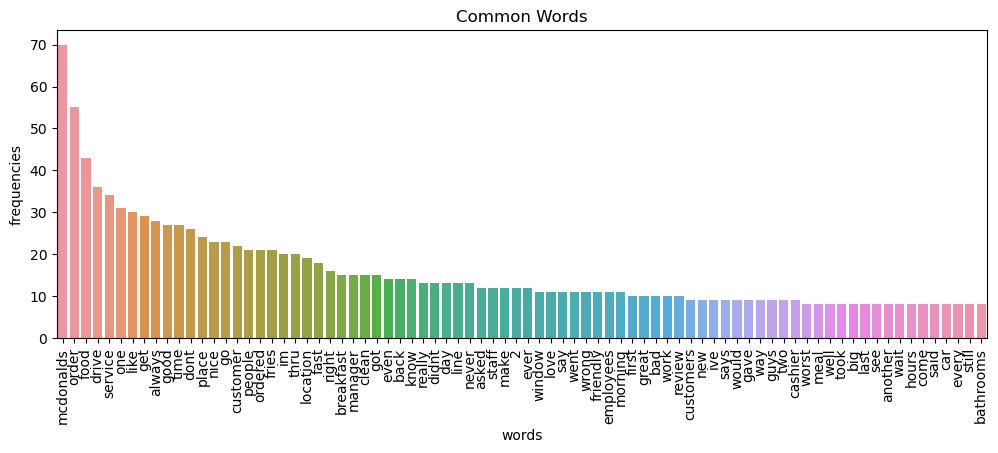

In [119]:
plt.figure(figsize=(12,4))
plt.title('Common Words')
sns.barplot(x='words',y='frequencies',data=freq)
plt.xticks(rotation=90)
plt.show()

## Stripping Out Common Words

In [121]:
freq.head(20)

,words,frequencies
0,mcdonalds,70
1,order,55
2,food,43
3,drive,36
4,service,34
5,one,31
6,like,30
7,get,29
8,always,28
9,good,27


In [124]:
other_stopwords = ['one','get','go','im','2','thru','tell','says','two']

In [125]:
df.head()

,review,word_count,char_count,stopword_count,review_lower,review_nopunc,review_nostop
0,Just an average McDonald's Nothing particularl...,13,88,2,just an average mcdonald's nothing particularl...,just an average mcdonalds nothing particularly...,average mcdonalds nothing particularly special...
1,"Nice floor and sitting area, clean store, food...",17,95,3,"nice floor and sitting area, clean store, food...",nice floor and sitting area clean store food o...,nice floor sitting area clean store food ok ni...
2,Ordered from a fast food burger place that lef...,15,88,5,ordered from a fast food burger place that lef...,ordered from a fast food burger place that lef...,ordered fast food burger place left burgers nu...
3,Very clean and organized. I like it made me fe...,97,485,42,very clean and organized. i like it made me fe...,very clean and organized i like it made me fee...,clean organized like made feel comfortable sta...
4,"Lastima que no hay estrella cero , los emplead...",84,412,11,"lastima que no hay estrella cero , los emplead...",lastima que no hay estrella cero los empleado...,lastima que hay estrella cero los empleados de...


In [133]:
df['review_noother'] = df['review_nostop'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

In [134]:
df.head()

,review,word_count,char_count,stopword_count,review_lower,review_nopunc,review_nostop,no_other,review_noother
0,Just an average McDonald's Nothing particularl...,13,88,2,just an average mcdonald's nothing particularl...,just an average mcdonalds nothing particularly...,average mcdonalds nothing particularly special...,average mcdonalds nothing particularly special...,average mcdonalds nothing particularly special...
1,"Nice floor and sitting area, clean store, food...",17,95,3,"nice floor and sitting area, clean store, food...",nice floor and sitting area clean store food o...,nice floor sitting area clean store food ok ni...,nice floor sitting area clean store food ok ni...,nice floor sitting area clean store food ok ni...
2,Ordered from a fast food burger place that lef...,15,88,5,ordered from a fast food burger place that lef...,ordered from a fast food burger place that lef...,ordered fast food burger place left burgers nu...,ordered fast food burger place left burgers nu...,ordered fast food burger place left burgers nu...
3,Very clean and organized. I like it made me fe...,97,485,42,very clean and organized. i like it made me fe...,very clean and organized i like it made me fee...,clean organized like made feel comfortable sta...,clean organized like made feel comfortable sta...,clean organized like made feel comfortable sta...
4,"Lastima que no hay estrella cero , los emplead...",84,412,11,"lastima que no hay estrella cero , los emplead...",lastima que no hay estrella cero los empleado...,lastima que hay estrella cero los empleados de...,lastima que hay estrella cero los empleados de...,lastima que hay estrella cero los empleados de...


In [135]:
freq.head(25)

,words,frequencies
0,mcdonalds,70
1,order,55
2,food,43
3,drive,36
4,service,34
5,one,31
6,like,30
7,get,29
8,always,28
9,good,27


In [136]:
pd.Series(" ".join(df['review_noother']).split()).value_counts().reset_index().head(25)

,index,0
0,mcdonalds,70
1,order,55
2,food,43
3,drive,36
4,service,34
5,one,31
6,like,30
7,get,29
8,always,28
9,good,27


# 4. Lemmatize the Reviews

In [141]:
!pip install textblob

In [143]:
from textblob import Word
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anapedra/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/anapedra/nltk_data...


True

In [149]:
df['cleaned_review'] = df['review_noother'].apply(lambda x: " ".join(Word(word).lemmatize() for word in x.split()))


In [150]:
print(df['review'].iloc[0])
print("---------------------------")
print(df['cleaned_review'].iloc[0])

Just an average McDonald's Nothing particularly special. Love a late night burger though
---------------------------
average mcdonalds nothing particularly special love late night burger though


# 5. Sentiment Analysis

In [151]:
from textblob import TextBlob

In [152]:
df['polarity'] = df['cleaned_review'].apply(lambda x:TextBlob(x).sentiment[0])
df['subjectivity'] = df['cleaned_review'].apply(lambda x:TextBlob(x).sentiment[1])

In [154]:
df[['review','polarity','subjectivity']].head()

,review,polarity,subjectivity
0,Just an average McDonald's Nothing particularl...,0.101786,0.542857
1,"Nice floor and sitting area, clean store, food...",0.511111,0.700000
2,Ordered from a fast food burger place that lef...,0.100000,0.300000
3,Very clean and organized. I like it made me fe...,0.357407,0.492593
4,"Lastima que no hay estrella cero , los emplead...",0.000000,0.000000


In [155]:
print(df.iloc[3]['review'])

Very clean and organized. I like it made me feel comfortable. The staff are very nice and polite do there job very well. The staff are fast and know how to keep the line short. You order in one side and pick up in the other side. They have seating available. In the first floor you can sit or go up the stairs to more seating and the bathrooms. Didn't go in the bathroom's but I know they have bathrooms. This is one of the best McDonald's I ever been into. I will be coming back here.


In [156]:
df[df['polarity']==-1.0].iloc[0]['review']

"this mc donald's has the most slowest people . they see a problem and don't fix it and blame a customer . worst customer service ever . for the quality of the food the prices are not work it for this service do not come here"

In [157]:
df[df['polarity']>=0.7].iloc[0]['review']

'I have never in my life had a triple cheeseburger with no pickles as good as this one!'